In [12]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import patsy




In [13]:
df=pd.read_csv('../assets/titanic.csv')


#### Cleaning data with no imputation

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [15]:
# I have tried in the past to use these variables as categorical in my model. Doing so decreases my model's score. 
# Theoretically, it also makes sense to use them as continuous  

df['SibSp']=df['SibSp'].astype(float);
df['Parch']=df['Parch'].astype(float);


In [16]:
list_of_cols_i_want = ['Survived', 'Pclass', 'Sex','Embarked', 'SibSp','Parch','Age', 'Fare'];

df_no_impute=df[list_of_cols_i_want];
df_no_impute = df_no_impute.dropna();

df_no_impute.info()
df_no_impute.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 8 columns):
Survived    712 non-null int64
Pclass      712 non-null int64
Sex         712 non-null object
Embarked    712 non-null object
SibSp       712 non-null float64
Parch       712 non-null float64
Age         712 non-null float64
Fare        712 non-null float64
dtypes: float64(4), int64(2), object(2)
memory usage: 50.1+ KB


,Survived,Pclass,Sex,Embarked,SibSp,Parch,Age,Fare
0,0,3,male,S,1.0,0.0,22.0,7.2500
1,1,1,female,C,1.0,0.0,38.0,71.2833
2,1,3,female,S,0.0,0.0,26.0,7.9250
3,1,1,female,S,1.0,0.0,35.0,53.1000
4,0,3,male,S,0.0,0.0,35.0,8.0500


In [17]:
#sstandardizing continuous features
from sklearn.preprocessing import StandardScaler
cont_var=['Age','SibSp','Parch']
x=df_no_impute[cont_var]


X_norm =  StandardScaler().fit_transform(x);
df_stand=pd.DataFrame(X_norm,columns=['Age','SibSp','Parch'])
len(df_stand)

712

In [18]:
#creating dummy variables for the other features

X = patsy.dmatrix('~ C(Pclass) + C(Embarked)+C(Sex)*Fare', df_no_impute)

df_cat=pd.DataFrame(X, columns=X.design_info.column_names)
df_cat


,Intercept,C(Pclass)[T.2],C(Pclass)[T.3],C(Embarked)[T.Q],C(Embarked)[T.S],C(Sex)[T.male],Fare,C(Sex)[T.male]:Fare
0,1.0,0.0,1.0,0.0,1.0,1.0,7.2500,7.2500
1,1.0,0.0,0.0,0.0,0.0,0.0,71.2833,0.0000
2,1.0,0.0,1.0,0.0,1.0,0.0,7.9250,0.0000
3,1.0,0.0,0.0,0.0,1.0,0.0,53.1000,0.0000
4,1.0,0.0,1.0,0.0,1.0,1.0,8.0500,8.0500
5,1.0,0.0,0.0,0.0,1.0,1.0,51.8625,51.8625
6,1.0,0.0,1.0,0.0,1.0,1.0,21.0750,21.0750
7,1.0,0.0,1.0,0.0,1.0,0.0,11.1333,0.0000
8,1.0,1.0,0.0,0.0,0.0,0.0,30.0708,0.0000
9,1.0,0.0,1.0,0.0,1.0,0.0,16.7000,0.0000


In [19]:
df2 = pd.concat([df_cat, df_stand], axis=1)
df2.head()



,Intercept,C(Pclass)[T.2],C(Pclass)[T.3],C(Embarked)[T.Q],C(Embarked)[T.S],C(Sex)[T.male],Fare,C(Sex)[T.male]:Fare,Age,SibSp,Parch
0,1.0,0.0,1.0,0.0,1.0,1.0,7.2500,7.25,-0.527669,0.522511,-0.506787
1,1.0,0.0,0.0,0.0,0.0,0.0,71.2833,0.00,0.577094,0.522511,-0.506787
2,1.0,0.0,1.0,0.0,1.0,0.0,7.9250,0.00,-0.251478,-0.552714,-0.506787
3,1.0,0.0,0.0,0.0,1.0,0.0,53.1000,0.00,0.369951,0.522511,-0.506787
4,1.0,0.0,1.0,0.0,1.0,1.0,8.0500,8.05,0.369951,-0.552714,-0.506787


In [20]:
X_no_impute=df2;


# X.astype(np.float32)
y_no_impute=df_no_impute['Survived'].values;


In [35]:
from sklearn.cross_validation import cross_val_score, StratifiedKFold,train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression



X_train, X_test, y_train, y_test = train_test_split(X_no_impute,\
                                                    y_no_impute,train_size=0.6,random_state=1,stratify=y_no_impute)


lg= LogisticRegression(random_state=5)
dt = DecisionTreeClassifier(class_weight='balanced',min_samples_split=50,random_state=5)
bdt = BaggingClassifier(DecisionTreeClassifier(random_state=5),random_state=5)
rf = RandomForestClassifier(class_weight='balanced', n_jobs=-1,random_state=5)
et = ExtraTreesClassifier(class_weight='balanced', n_jobs=-1,random_state=5)
abc = AdaBoostClassifier(random_state=5)
gbst = GradientBoostingClassifier(random_state=5)
bnb = BernoulliNB()
svc= SVC(kernel='linear',probability=True,random_state=5)
knn = KNeighborsClassifier()


cv_train = StratifiedKFold(y_train, n_folds=5, shuffle=True, random_state=5)
cv_test = StratifiedKFold(y_test, n_folds=5, shuffle=True, random_state=5)

def train_score(model, name):
    train_score = cross_val_score(model, X_train, y_train, cv=cv_train, n_jobs=-1)
    test_score = cross_val_score(model, X_test, y_test, cv=cv_test, n_jobs=-1)
    print "{} Training Accuracy Score:\t{:0.3} ± {:0.3}".format(name, train_score.mean().round(3),\
                                                                train_score.std().round(3))
    print "{} Test Accuracy Score:\t{:0.3} ± {:0.3}".format(name, test_score.mean().round(3),\
                                                                test_score.std().round(3))
    print " "

    
        
train_score(dt,"Decision Tree")
train_score(lg, "Logistic Regres")
train_score(bdt, "Bagging DT")
train_score(rf, "Random Forest")
train_score(et, "Extra Trees")
train_score(abc, "Ada Boost")
train_score(gbst, "Grad Boosting")
train_score(bnb, "Bernoulli NB")
train_score(svc, "SVC")
train_score(knn, "KNN")


Decision Tree Training Accuracy Score:	0.782 ± 0.027
Decision Tree Test Accuracy Score:	0.758 ± 0.023
 
Logistic Regres Training Accuracy Score:	0.796 ± 0.024
Logistic Regres Test Accuracy Score:	0.796 ± 0.05
 
Bagging DT Training Accuracy Score:	0.803 ± 0.012
Bagging DT Test Accuracy Score:	0.8 ± 0.05
 
Random Forest Training Accuracy Score:	0.831 ± 0.024
Random Forest Test Accuracy Score:	0.772 ± 0.052
 
Extra Trees Training Accuracy Score:	0.764 ± 0.029
Extra Trees Test Accuracy Score:	0.772 ± 0.027
 
Ada Boost Training Accuracy Score:	0.808 ± 0.031
Ada Boost Test Accuracy Score:	0.765 ± 0.024
 
Grad Boosting Training Accuracy Score:	0.834 ± 0.017
Grad Boosting Test Accuracy Score:	0.804 ± 0.041
 
Bernoulli NB Training Accuracy Score:	0.789 ± 0.021
Bernoulli NB Test Accuracy Score:	0.765 ± 0.052
 
SVC Training Accuracy Score:	0.785 ± 0.018
SVC Test Accuracy Score:	0.765 ± 0.052
 
KNN Training Accuracy Score:	0.768 ± 0.045
KNN Test Accuracy Score:	0.779 ± 0.059
 


In [36]:
df_impute=pd.read_csv('../assets/titanic_imp.csv')

In [37]:
from sklearn.preprocessing import StandardScaler
cont_var=['Age','SibSp','Parch']
x=df_impute[cont_var]


X_norm = StandardScaler().fit_transform(x);
df_stand=pd.DataFrame(X_norm,columns=['Age','SibSp','Parch'])
len(df_stand)

889

In [38]:
X = patsy.dmatrix('~ C(Pclass)+C(Sex)*Fare+C(Embarked)', df_impute)

df_cat=pd.DataFrame(X, columns=X.design_info.column_names)
df_cat.head()

,Intercept,C(Pclass)[T.2],C(Pclass)[T.3],C(Sex)[T.2],C(Embarked)[T.Q],C(Embarked)[T.S],Fare,C(Sex)[T.2]:Fare
0,1.0,0.0,1.0,1.0,0.0,1.0,7.2500,7.25
1,1.0,0.0,0.0,0.0,0.0,0.0,71.2833,0.00
2,1.0,0.0,1.0,0.0,0.0,1.0,7.9250,0.00
3,1.0,0.0,0.0,0.0,0.0,1.0,53.1000,0.00
4,1.0,0.0,1.0,1.0,0.0,1.0,8.0500,8.05


In [39]:
df3 = pd.concat([df_cat, df_stand], axis=1)
len(df_stand)

889

In [40]:
X_impute=df3.as_matrix().astype(float);
y_impute=df_impute['Survived'].values;


In [41]:
X=X_impute
y=y_impute

In [43]:
# synthetic minority over-sampling technique
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=70)
X_resampled, y_resampled = ros.fit_sample(X, y)


In [47]:
from sklearn.cross_validation import cross_val_score, StratifiedKFold,train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC


from sklearn.cross_validation import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC



X_train, X_test, y_train, y_test = train_test_split(X_resampled,\
                                                    y_resampled,train_size=0.6,random_state=1,stratify=y_resampled)


lg= LogisticRegression(random_state=5)
dt = DecisionTreeClassifier(class_weight='balanced',min_samples_split=50,random_state=5)
bdt = BaggingClassifier(DecisionTreeClassifier(random_state=5),random_state=5)
rf = RandomForestClassifier(class_weight='balanced', n_jobs=-1,random_state=5)
et = ExtraTreesClassifier(class_weight='balanced', n_jobs=-1,random_state=5)
abc = AdaBoostClassifier(random_state=5)
gbst = GradientBoostingClassifier(random_state=5)
bnb = BernoulliNB()
svc= SVC(kernel='linear',probability=True,random_state=5)
knn = KNeighborsClassifier()


cv_train = StratifiedKFold(y_train, n_folds=5, shuffle=True, random_state=5)
cv_test = StratifiedKFold(y_test, n_folds=5, shuffle=True, random_state=17)

def train_score(model, name):
    train_score = cross_val_score(model, X_train, y_train, cv=cv_train, n_jobs=-1)
    test_score = cross_val_score(model, X_test, y_test, cv=cv_test, n_jobs=-1)
    print "{} Training Accuracy Score:\t{:0.3} ± {:0.3}".format(name, train_score.mean().round(3),\
                                                                train_score.std().round(3))
    print "{} Test Accuracy Score:\t{:0.3} ± {:0.3}".format(name, test_score.mean().round(3),\
                                                                test_score.std().round(3))
    print " "

    
        
train_score(dt,"Decision Tree")
train_score(lg, "Logistic Regres")
train_score(bdt, "Bagging DT")
train_score(rf, "Random Forest")
train_score(et, "Extra Trees")
train_score(abc, "Ada Boost")
train_score(gbst, "Grad Boosting")
train_score(bnb, "Bernoulli NB")
train_score(svc, "SVC")
train_score(knn, "KNN")

Decision Tree Training Accuracy Score:	0.761 ± 0.054
Decision Tree Test Accuracy Score:	0.814 ± 0.027
 
Logistic Regres Training Accuracy Score:	0.772 ± 0.031
Logistic Regres Test Accuracy Score:	0.789 ± 0.031
 
Bagging DT Training Accuracy Score:	0.84 ± 0.045
Bagging DT Test Accuracy Score:	0.836 ± 0.024
 
Random Forest Training Accuracy Score:	0.831 ± 0.03
Random Forest Test Accuracy Score:	0.841 ± 0.039
 
Extra Trees Training Accuracy Score:	0.848 ± 0.022
Extra Trees Test Accuracy Score:	0.825 ± 0.032
 
Ada Boost Training Accuracy Score:	0.78 ± 0.036
Ada Boost Test Accuracy Score:	0.814 ± 0.061
 
Grad Boosting Training Accuracy Score:	0.818 ± 0.045
Grad Boosting Test Accuracy Score:	0.868 ± 0.032
 
Bernoulli NB Training Accuracy Score:	0.777 ± 0.026
Bernoulli NB Test Accuracy Score:	0.766 ± 0.056
 
SVC Training Accuracy Score:	0.78 ± 0.024
SVC Test Accuracy Score:	0.775 ± 0.045
 
KNN Training Accuracy Score:	0.778 ± 0.025
KNN Test Accuracy Score:	0.786 ± 0.06
 


In [48]:
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold


X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled,
                                                    train_size=0.6,
                                                    random_state=5,
                                                    stratify=y_resampled)

gbst = GradientBoostingClassifier(random_state=5)
 

param_grid = {"max_depth": [3,5,10,20,30],
          "max_features": [None, "auto"],
          "min_samples_leaf": [10,50,70],
          "min_samples_split": [2, 5, 7,10],
          'n_estimators': [16, 32,48], 
          'learning_rate': [0.1, 0.5, 0.8]
         } 



inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)

clf = GridSearchCV(estimator=gbst, param_grid=param_grid, cv=inner_cv)
clf.fit(X_train, y_train)

nested_score = cross_val_score(clf, X=X_train, y=y_train, cv=outer_cv,n_jobs=-1)
print "{} Outer Accuracy Score:\t{:0.3} ± {:0.3}".format(clf, nested_score.mean().round(3),\
                                                                nested_score.std().round(3))


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=5, shuffle=True),
       error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=5,
              subsample=1.0, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'learning_rate': [0.1, 0.5, 0.8], 'min_samples_leaf': [10, 50, 70], 'n_estimators': [16, 32, 48], 'min_samples_split': [2, 5, 7, 10], 'max_features': [None, 'auto'], 'max_depth': [3, 5, 10, 20, 30]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0) Outer Accuracy Score:	0.845 ± 0.017


In [ ]:
# GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=5, shuffle=True),
#        error_score='raise',
#        estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
#               learning_rate=0.1, loss='deviance', max_depth=3,
#               max_features=None, max_leaf_nodes=None,
#               min_impurity_split=1e-07, min_samples_leaf=1,
#               min_samples_split=2, min_weight_fraction_leaf=0.0,
#               n_estimators=100, presort='auto', random_state=5,
#               subsample=1.0, verbose=0, warm_start=False),
#        fit_params={}, iid=True, n_jobs=1,
#        param_grid={'learning_rate': [0.1, 0.5, 0.8], 'min_samples_leaf': [10, 50, 70], 'n_estimators': [16, 32, 48], 'min_samples_split': [2, 5, 7, 10], 'max_features': [None, 'auto'], 'max_depth': [3, 5, 10, 20, 30]},
#        pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
#        scoring=None, verbose=0) Outer Accuracy Score:	0.845 ± 0.017

In [50]:
from sklearn.metrics import accuracy_score

clf.fit(X_train, y_train)

train_acc = accuracy_score(y_true=y_train, y_pred=clf.predict(X_train))


# print('Accuracy %.2f%% (average)' %
#       (100 * clf.best_score_))
print('Best Parameters: %s' % clf.best_params_)
print('Training Accuracy: %.2f%%' % (100 * train_acc))


Best Parameters: {'learning_rate': 0.8, 'min_samples_leaf': 10, 'n_estimators': 32, 'min_samples_split': 2, 'max_features': None, 'max_depth': 10}
Training Accuracy: 99.39%


In [51]:
best_clf = clf.best_estimator_
final_model = best_clf.fit(X_resampled, y_resampled)
best_acc=accuracy_score(y_true=y_resampled, y_pred=final_model.predict(X_resampled))

print('Final Model Accuracy: %.2f%%' % (100 * best_acc))
print ' '
print final_model

Final Model Accuracy: 98.91%
 
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.8, loss='deviance', max_depth=10,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=10,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=32, presort='auto', random_state=5,
              subsample=1.0, verbose=0, warm_start=False)


In [56]:
from sklearn.metrics import confusion_matrix,classification_report


y_pred_train=clf.predict(X_train)
y_pred_test=clf.predict(X_test)
y_pred_all=clf.predict(X_resampled)





matrix1 = np.array(confusion_matrix(y_train,y_pred_train))

confusion1 = pd.DataFrame(matrix1, index=['Died','Survived'],\
                     columns=['Died','Survived'])

matrix2 = np.array(confusion_matrix(y_test, y_pred_test))


confusion2 = pd.DataFrame(matrix2, index=['Died','Survived'],\
                     columns=['Died','Survived'])

matrix3 = np.array(confusion_matrix(y_resampled,y_pred_all))

confusion3 = pd.DataFrame(matrix3, index=['Died','Survived'],\
                     columns=['Died','Survived'])



In [57]:
print accuracy_score(y_train, y_pred_train)
print classification_report(y_train, y_pred_train)

0.990881458967
             precision    recall  f1-score   support

          0       1.00      0.98      0.99       329
          1       0.98      1.00      0.99       329

avg / total       0.99      0.99      0.99       658



In [58]:
print accuracy_score(y_test, y_pred_test)
print classification_report(y_test, y_pred_test)

0.986363636364
             precision    recall  f1-score   support

          0       0.99      0.98      0.99       220
          1       0.98      0.99      0.99       220

avg / total       0.99      0.99      0.99       440



In [59]:
print accuracy_score(y_resampled, y_pred_all)
print classification_report(y_resampled, y_pred_all)

0.989071038251
             precision    recall  f1-score   support

          0       0.99      0.98      0.99       549
          1       0.98      0.99      0.99       549

avg / total       0.99      0.99      0.99      1098



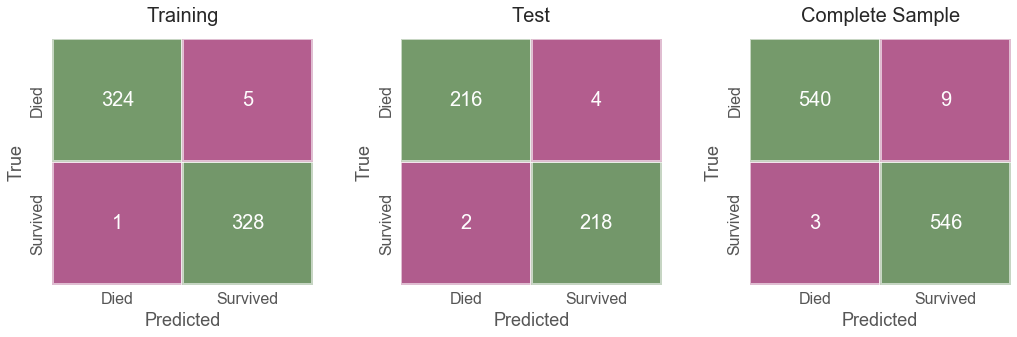

In [67]:
plt.style.use(['ggplot'])

fig, axes = plt.subplots(1,3, figsize=(14,4))
# plt.tight_layout(h_pad=2)
plt.tight_layout(w_pad=6.0)

cmap = sns.diverging_palette(85, 1, as_cmap=True)
sns.heatmap(confusion1, annot=True, annot_kws={"size": 20},cmap='PiYG',fmt='g', cbar=False,linewidths=2,ax=axes[0], alpha=.6)
# plt.xticks(rotation=0, fontsize=16)
# plt.yticks(fontsize=16)
axes[0].set_xticklabels(['Died', 'Survived'], fontsize=16)
axes[0].set_yticklabels(['Survived', 'Died'], fontsize=16)
axes[0].set_ylabel('True', fontsize=18)
axes[0].set_xlabel('Predicted', fontsize=18)
axes[0].set_title("Training", fontsize=20, y=1.05)

sns.heatmap(confusion2, annot=True, annot_kws={"size": 20},cmap='PiYG',fmt='g', cbar=False,linewidths=2,ax=axes[1], alpha=.6)
axes[1].set_xticklabels(['Died', 'Survived'], fontsize=16)
axes[1].set_yticklabels(['Survived', 'Died'], fontsize=16)
axes[1].set_ylabel('True', fontsize=18)
axes[1].set_xlabel('Predicted', fontsize=18)
axes[1].set_title("Test", fontsize=20, y=1.05)

sns.heatmap(confusion3, annot=True, annot_kws={"size": 20},cmap='PiYG',fmt='g', cbar=False,linewidths=2,ax=axes[2], alpha=.6)
axes[2].set_xticklabels(['Died', 'Survived'], fontsize=16)
axes[2].set_yticklabels(['Survived', 'Died'], fontsize=16)
axes[2].set_ylabel('True', fontsize=18)
axes[2].set_xlabel('Predicted', fontsize=18)
axes[2].set_title("Complete Sample", fontsize=20, y=1.05)

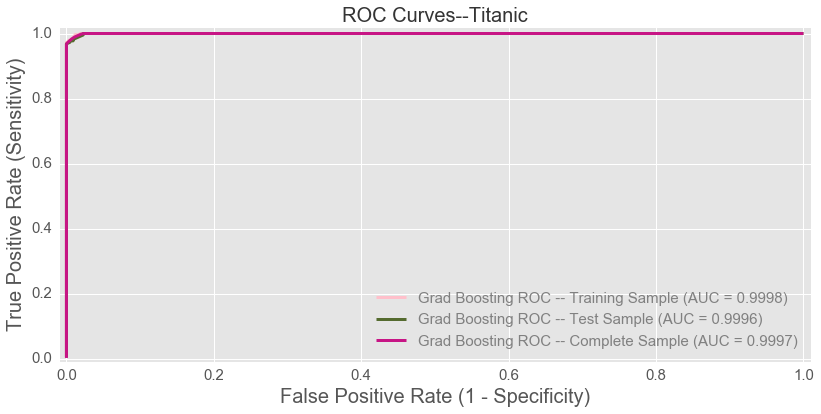

In [277]:
plt.style.use(['ggplot'])

plt.figure(figsize=(12,6))

y_pred_train1 = clf.predict_proba(X_train)[:,1]
y_pred_test1 = clf.predict_proba(X_test)[:,1]
y_pred_all1 = clf.predict_proba(X_resampled5)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_pred_train1)
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, y_pred_test1)
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_resampled5, y_pred_all1)


ROC_AUC = auc(fpr, tpr)
ROC_AUC1 = auc(fpr1, tpr1)
ROC_AUC2 = auc(fpr2, tpr2)



plt.plot(fpr, tpr, label='Grad Boosting ROC -- Training Sample (AUC = %0.4f)' % ROC_AUC,color='pink', linewidth=3)
plt.plot(fpr1, tpr1, label='Grad Boosting ROC -- Test Sample (AUC = %0.4f)' % ROC_AUC1, color='darkolivegreen',linewidth=3)
plt.plot(fpr2, tpr2, label='Grad Boosting ROC -- Complete Sample (AUC = %0.4f)' % ROC_AUC2, color='mediumvioletred',linewidth=3)


plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.02])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=20)
plt.ylabel('True Positive Rate (Sensitivity)',fontsize=20)

l=plt.legend(loc='lower right', fontsize=15)
for text in l.get_texts():
    text.set_color("gray")

plt.title('ROC Curves--Titanic', color="black", alpha=0.8,fontsize=20)
plt.show()
